In [1]:
from data_loader import *
import keras
from keras.models import Model, load_model
from keras import backend as K
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

/home/morads/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_file = "/datax/yzhang/training_data/training_data_chunk_14.pkl"

CLASSES = ['16PSK', '2FSK_5KHz', '2FSK_75KHz', '8PSK', 'AM_DSB', 'AM_SSB', 'APSK16_c34',
 'APSK32_c34', 'BPSK', 'CPFSK_5KHz', 'CPFSK_75KHz', 'FM_NB', 'FM_WB',
 'GFSK_5KHz', 'GFSK_75KHz', 'GMSK', 'MSK', 'NOISE', 'OQPSK', 'PI4QPSK', 'QAM16',
 'QAM32', 'QAM64', 'QPSK']

COLORS = {
    '16PSK': '#e6194b', 
    '2FSK_5KHz': '#3cb44b', 
    '2FSK_75KHz': '#ffe119', 
    '8PSK': '#0082c8', 
    'AM_DSB': '#0082c8', 
    'AM_SSB':'#911eb4', 
    'APSK16_c34': '#46f0f0',
    'APSK32_c34': '#f032e6', 
    'BPSK': '#d2f53c', 
    'CPFSK_5KHz': '#fabebe', 
    'CPFSK_75KHz': '#008080', 
    'FM_NB': '#e6beff', 
    'FM_WB': '#aa6e28',
    'GFSK_5KHz': '#fffac8', 
    'GFSK_75KHz': '#800000', 
    'GMSK': '#aaffc3', 
    'MSK': '#808000', 
    'NOISE': '#ffd8b1', 
    'OQPSK': '#000080', 
    'PI4QPSK': '#808080', 
    'QAM16': '#0AC0E0',
    'QAM32': '#000000', 
    'QAM64': '#E00A19', 
    'QPSK': '#3BF703'}


testdata = LoadModRecData(data_file, 1., 0., 0., load_snrs=[6,10], load_mods = [CLASSES[i] for i in [0,1,3]])
data = testdata.signalData
labels = testdata.signalLabels

[Data Loader] - Loading Data...
[Data Loader] - Counting Number of Examples in Dataset...
[Data Loader] - Number of Examples in Dataset: 12000
[Data Loader] - [Modulation Dataset] Adding Collects for: 16PSK
[Data Loader] - [Modulation Dataset] Adding Collects for: 2FSK_5KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: 8PSK
[Data Loader] - Converting to numpy arrays...
[Data Loader] - Shuffling Data...
[Data Loader] - Splitting Data...
[Data Loader] - Train Size: 12000 Validation Size: 0 Test Size: 0
[Data Loader] - Done.



In [4]:
def tsne_model(model, data, layer_name = None, pca_dim = 50, tsne_dim = 2):
    """
    Does tsne reduction
    Parameters:
    model (keras model)
    data (np array): input data for the model
    layer_name: name of the output layer to do tsne on. 'None' will use 2nd to last layer, before final dense layer
 
    pca_dim (int): first dimensions are reduced using PCA to this number of dimensions
    tsne_dim (int): final desired dimension after doing tsne reduction
    
    Returns:
    np.array: Shape (data.shape[0], tsne_reduc); sample points in reduced space
    """
    
    if not layer_name:
        layer_name = model.layers[-2].name
    
    intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
    
    intermediate_output = intermediate_layer_model.predict(data)
    
    pca = PCA(n_components= pca_dim)
    output_pca_reduced = pca.fit_transform(intermediate_output)
    
    tsne = TSNE(n_components=tsne_dim)
    intermediates_tsne = tsne.fit_transform(output_pca_reduced)
    return intermediates_tsne

In [8]:
model = load_model('../../mod_group0_val_loss5754_copy.h5')

In [9]:
intermediates_tsne = tsne_model(model, data)

In [10]:
color_intermediates = []
for label in labels:
    color_intermediates.append(COLORS[label[0]])
            

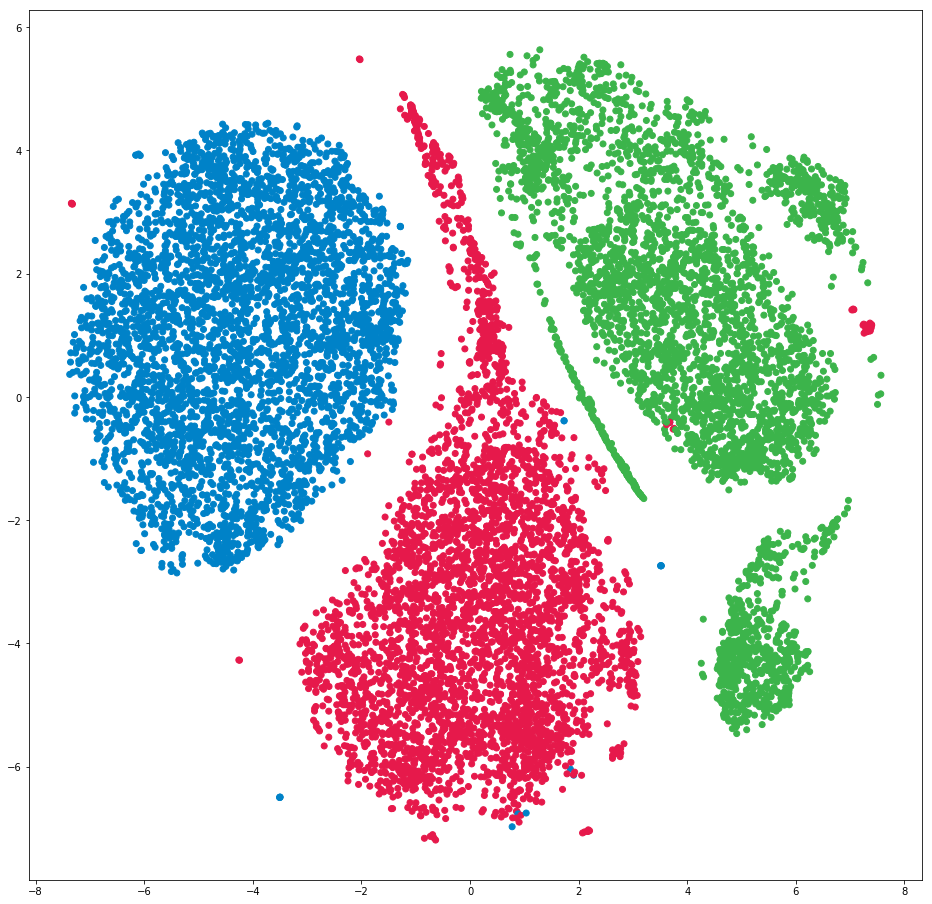

In [11]:
plt.figure(figsize=(16, 16))
plt.scatter(x = intermediates_tsne[:,0], y=intermediates_tsne[:,1], color=color_intermediates)
plt.show()